Import Data dan Liblary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pkmn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datamin/Pokemon.csv", index_col=0)

In [ ]:
pkmn.shape

(800, 12)

In [ ]:
pkmn.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
pkmn.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Text(0, 0.5, 'type')

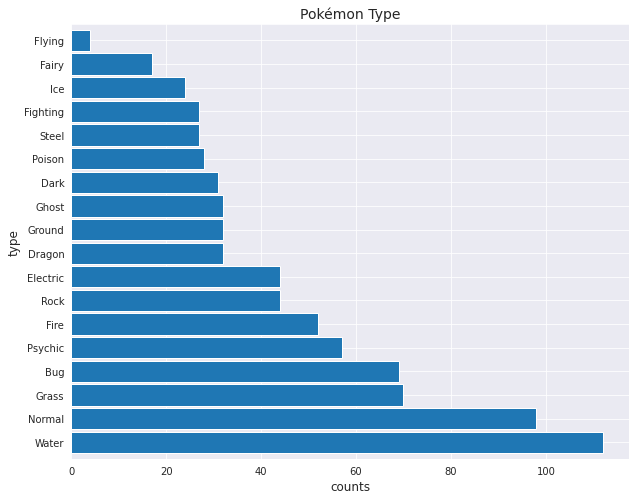

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
pkmn['Type 1'].value_counts().plot.barh(width=.9).set_title('Pokémon Type', fontsize=14)
plt.xlabel('counts', fontsize=12)
plt.ylabel('type', fontsize=12)

**Legendary Pokémon berdasarkan tipe**

In [ ]:
pkmn['Legendary'].value_counts()
# 65 Pokemon Legendary

False    735
True      65
Name: Legendary, dtype: int64

In [ ]:
pkmn[pkmn['Legendary']==True]['Type 1'].value_counts()

Psychic     14
Dragon      12
Fire         5
Steel        4
Ground       4
Water        4
Rock         4
Electric     4
Grass        3
Dark         2
Flying       2
Ghost        2
Normal       2
Ice          2
Fairy        1
Name: Type 1, dtype: int64

**Generations dari Pokémon**

In [ ]:
pkmn['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [ ]:
pkmn2= pkmn.drop(['Total', 'Legendary'], axis=1)

**Boxplot dari powers per Generations 1-6**

1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
5             AxesSubplot(0.1,0.15;0.363636x0.220588)
6        AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

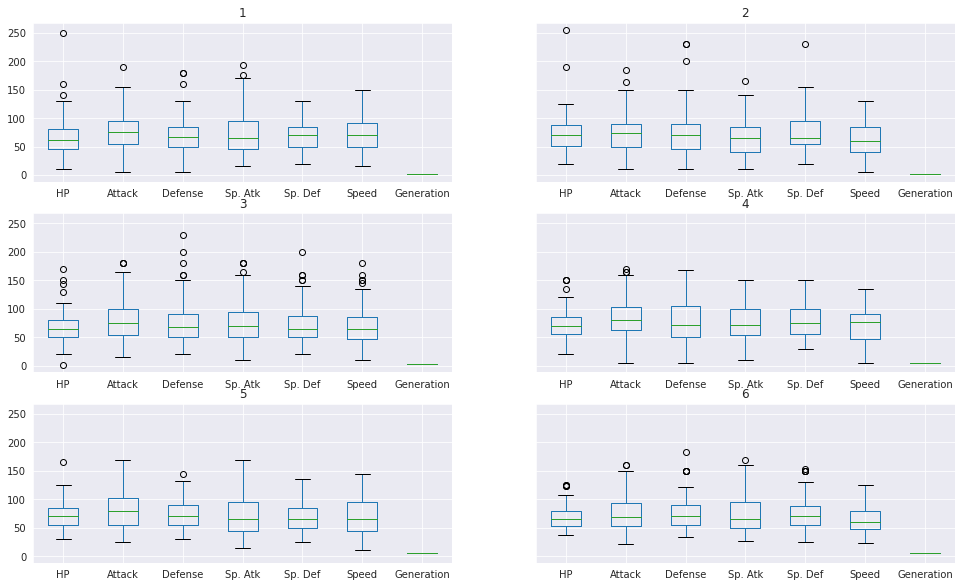

In [ ]:
pkmn2.groupby('Generation').boxplot(figsize=(16,10))

**Siapkan data untuk KNN**

* Hapus object dtypes: Name, Type 1, Type 2
* Hapus kolom 'Total' sebab menjumlahkan power point merupakan variabel dalam data

In [ ]:
pkmn_knn= pkmn.copy()
pkmn_knn.drop(['Name','Type 1', 'Type 2', 'Total'],axis=1, inplace=True)

In [ ]:
pkmn_knn.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,
1,45,49,49,65,65,45,1,False
2,60,62,63,80,80,60,1,False
3,80,82,83,100,100,80,1,False
3,80,100,123,122,120,80,1,False
4,39,52,43,60,50,65,1,False


In [ ]:
pkmn_knn.dtypes

HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary      bool
dtype: object

In [ ]:
pkmn_knn['Legendary'] = pkmn_knn['Legendary'].astype(int)

**Standarisasi dan Normalisasi data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(pkmn_knn.drop('Legendary', axis=1))
scaled_data= scaler.transform(pkmn_knn.drop('Legendary', axis=1))
scaled= pd.DataFrame(scaled_data, columns=pkmn_knn.columns[:-1])

In [ ]:
X= scaled
y= pkmn_knn['Legendary']

**Train Test Split Data untuk KNN**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=88)

**Import KNN sklearn library KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1)

**Fit the training sets**

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Prediksi dari test set**

In [ ]:
predictions= knn.predict(X_test)

**Evaluasi accuracy rates dari model**

95.4%

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, predictions):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, predictions, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, predictions, pos_label=None,
                              average='weighted')
    # rata rata harmonic dari precision and recall
    f1 = f1_score(y_test, predictions, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, predictions)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.954, precision = 0.953, recall = 0.954, f1 = 0.953


**Plot Confusion Matrix**

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=30)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

    return plt

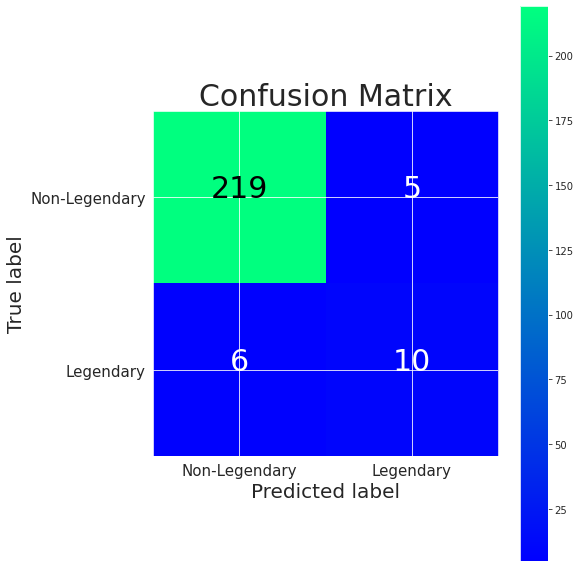

In [ ]:
cm= confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm, classes=['Non-Legendary','Legendary'], normalize=False, title='Confusion Matrix')
plt.show()

**Haruskah kita memilih n_neighbors yang berbeda dari 1?**

* knn= KNeighborsClassifier(n_neighbors=1)

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

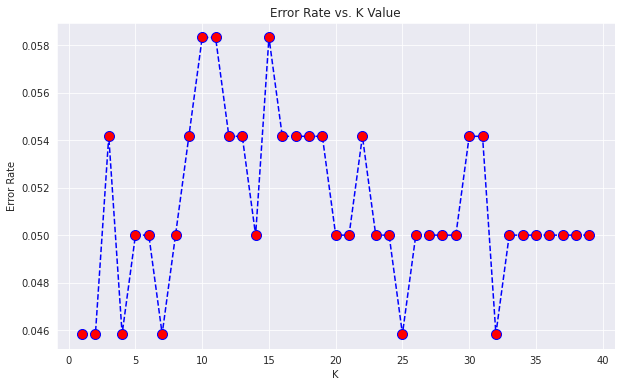

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Error Rate sudah rendah untuk K=1